In [17]:
import pandas as pd 
import numpy as np

In [22]:
data =  pd.read_csv('titanic-passengers.csv', sep=';'  , engine='python')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [23]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# Replacing missing values :

data['Age'].fillna(data['Age'].mean() , inplace = True)
data['Cabin'].fillna("G6" , inplace = True)
data['Embarked'].fillna("S" , inplace = True)

In [58]:
cleanup_nums_2 = {'Sex' : {'male': 0 , 'female': 1}}
df.replace(cleanup_nums_2 , inplace = True)

In [60]:
data['Sex'].head()

0    0
1    0
2    0
3    1
4    0
Name: Sex, dtype: int64

In [61]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [62]:
# Transforming numerical values to categorical values :

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cleanup_nums = {'Survived' : {'No': 0 , 'Yes': 1}}
df.replace(cleanup_nums , inplace = True)
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [71]:
x = data[['Pclass' , 'Sex']]
y = data['Survived']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [82]:
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

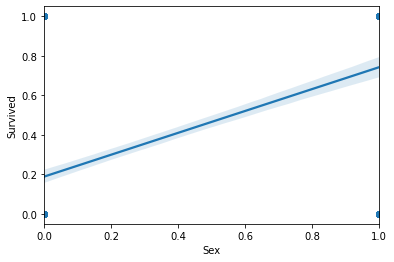

In [77]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

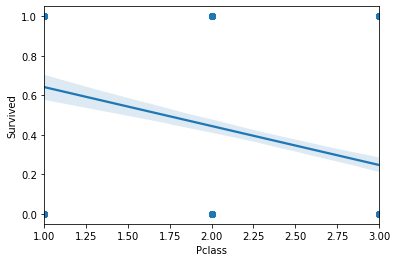

In [78]:
sns.regplot(x='Pclass',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

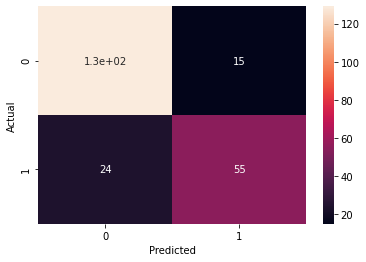

In [79]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [88]:
# ROC curves make it easier to identify the best threshhold for making a decision

In [89]:
# AUC can help you decide which catergorization method is better

In [83]:
from sklearn.svm import SVC

model_svc = SVC(kernel = 'rbf' , random_state  = 4)
model_svc.fit(x_train , y_train)

y_pred_svm = model_svc.decision_function(x_test)

In [84]:
model_log = LogisticRegression()
model_log.fit(x_train , y_train)

y_pred_log = model_log.decision_function(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

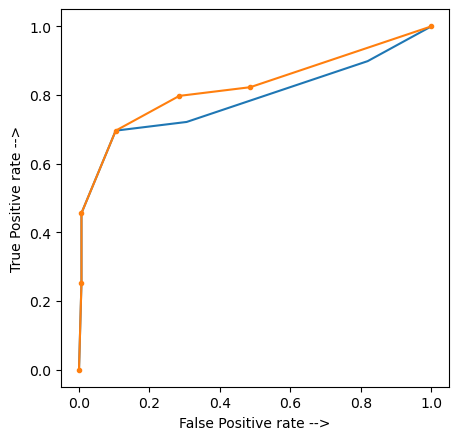

In [91]:
from sklearn.metrics import roc_curve, auc

logistic_fpr , logistic_tpr , threshold = roc_curve(y_test , y_pred_log)
auc_logistic = auc(logistic_fpr , logistic_tpr)

svm_fpr , svm_tpr , threshold = roc_curve(y_test , y_pred_svm)
auc_svm = auc(svm_fpr , svm_tpr)

plt.figure(figsize = (5 , 5) , dpi = 100)
plt.plot(svm_fpr , svm_tpr , linestyle = '-' , label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr , logistic_tpr , marker = '.' , label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive rate -->')
plt.ylabel('True Positive rate -->')

plt.legend

plt.show